## 🎯 where do we want to reach:
L'objectif de ce workshop est d'accompagner les participants dans la création d'un modèle d'apprentissage automatique pour prédire la probabilité d'un AVC. En travaillant avec des données médicales réelles, les participants découvriront les étapes de prétraitement des données, l'ingénierie des variables et l'entraînement des modèles. Ensemble, nous mettrons en œuvre et évaluerons sept techniques d'apprentissage automatique pour identifier les schémas et les facteurs de risque associés aux AVC. Cette expérience pratique vise à doter les participants de compétences concrètes en détection précoce et en modélisation prédictive, tout en soulignant l'importance des analyses basées sur les données dans le domaine de la santé.

## 💿 Dataset Description:
The dataset used in this project contains medical records of patients and their associated risk factors for stroke. It includes the following features:

1. **Id:** Unique identification number for each patient.
2. **Age:** The age of the patient.
3. **Hypertension:** Whether the patient has hypertension (1 for yes, 0 for no).
4. **Heart Disease:** Whether the patient has a history of heart disease (1 for yes, 0 for no).
5. **Ever Married:** Whether the patient has been married (1 for yes, 0 for no).
6. **Work Type:** The type of work the patient does (e.g., private, self-employed, government, children).
7. **Residence Type:** Whether the patient resides in an urban or rural area.
8. **Glucose Level:** The patient's glucose level.
9. **BMI (Body Mass Index):** A measure of body fat based on height and weight.
10. **Smoking Status:** The smoking habit of the patient (e.g., never smoked, formerly smoked, currently smoking).
11. **Stroke:** The target variable indicating whether the patient had a stroke (1 for yes, 0 for no).
    
This dataset is used to identify the risk factors contributing to stroke prediction, making it suitable for classification models to determine the likelihood of stroke based on these factors.

Now, let's begin to code! 👩‍💻

## 📚 Importing the libraries

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,11)
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score,roc_auc_score,accuracy_score,confusion_matrix,precision_recall_curve,auc,roc_curve,recall_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score,roc_curve
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')


## 📖 Reading the dataset

In [95]:
dataset = pd.read_csv("healthcare-dataset-stroke-adjusted-data.csv")

In [96]:
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,8154,Male,57.0,1,0,Yes,Govt_job,Urban,78.92,27.7,formerly smoked,1
1,61096,Male,57.0,0,0,Yes,Private,Rural,70.16,25.8,formerly smoked,0
2,11762,Female,76.0,0,0,Yes,Private,Urban,207.28,34.9,Unknown,1
3,47802,Male,28.0,0,0,No,Private,Urban,256.74,23.4,formerly smoked,0
4,58978,Female,70.0,0,1,Yes,Private,Rural,239.07,26.1,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7346,26015,Female,66.0,0,0,Yes,Self-employed,Urban,101.45,NaN,Unknown,1
7347,60744,Male,61.0,1,0,Yes,Self-employed,Rural,76.11,27.3,smokes,1
7348,33879,Male,42.0,0,0,Yes,Private,Rural,83.41,25.4,Unknown,1
7349,32240,Female,27.0,0,0,No,Private,Urban,93.55,41.6,never smoked,0


In [97]:
#Creating a copy of dataset
data = dataset.copy()

## 🛠️ Data Preprocessing

In [98]:
data.shape

(7351, 12)

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7351 entries, 0 to 7350
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7351 non-null   int64  
 1   gender             7351 non-null   object 
 2   age                7351 non-null   float64
 3   hypertension       7351 non-null   int64  
 4   heart_disease      7351 non-null   int64  
 5   ever_married       7351 non-null   object 
 6   work_type          7351 non-null   object 
 7   Residence_type     7351 non-null   object 
 8   avg_glucose_level  7351 non-null   float64
 9   bmi                6790 non-null   float64
 10  smoking_status     7351 non-null   object 
 11  stroke             7351 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 689.3+ KB


In [100]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  561
smoking_status         0
stroke                 0
dtype: int64

In [101]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,7351.000000,7351.000000,7351.000000,7351.000000,7351.000000,6790.000000,7351.000000
mean,36699.901510,50.696079,0.148551,0.095089,114.194993,29.330398,0.338729
std,21406.638615,23.062027,0.355670,0.293358,52.320294,7.492710,0.473310
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17472.000000,34.000000,0.000000,0.000000,77.875000,24.200000,0.000000
50%,36841.000000,55.000000,0.000000,0.000000,94.470000,28.450000,0.000000
75%,55380.500000,71.000000,0.000000,0.000000,128.105000,33.200000,1.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### Replacing the missing values with mean

In [102]:
( data.isna().sum() / data.shape[0] * 100)

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  7.631615
smoking_status       0.000000
stroke               0.000000
dtype: float64

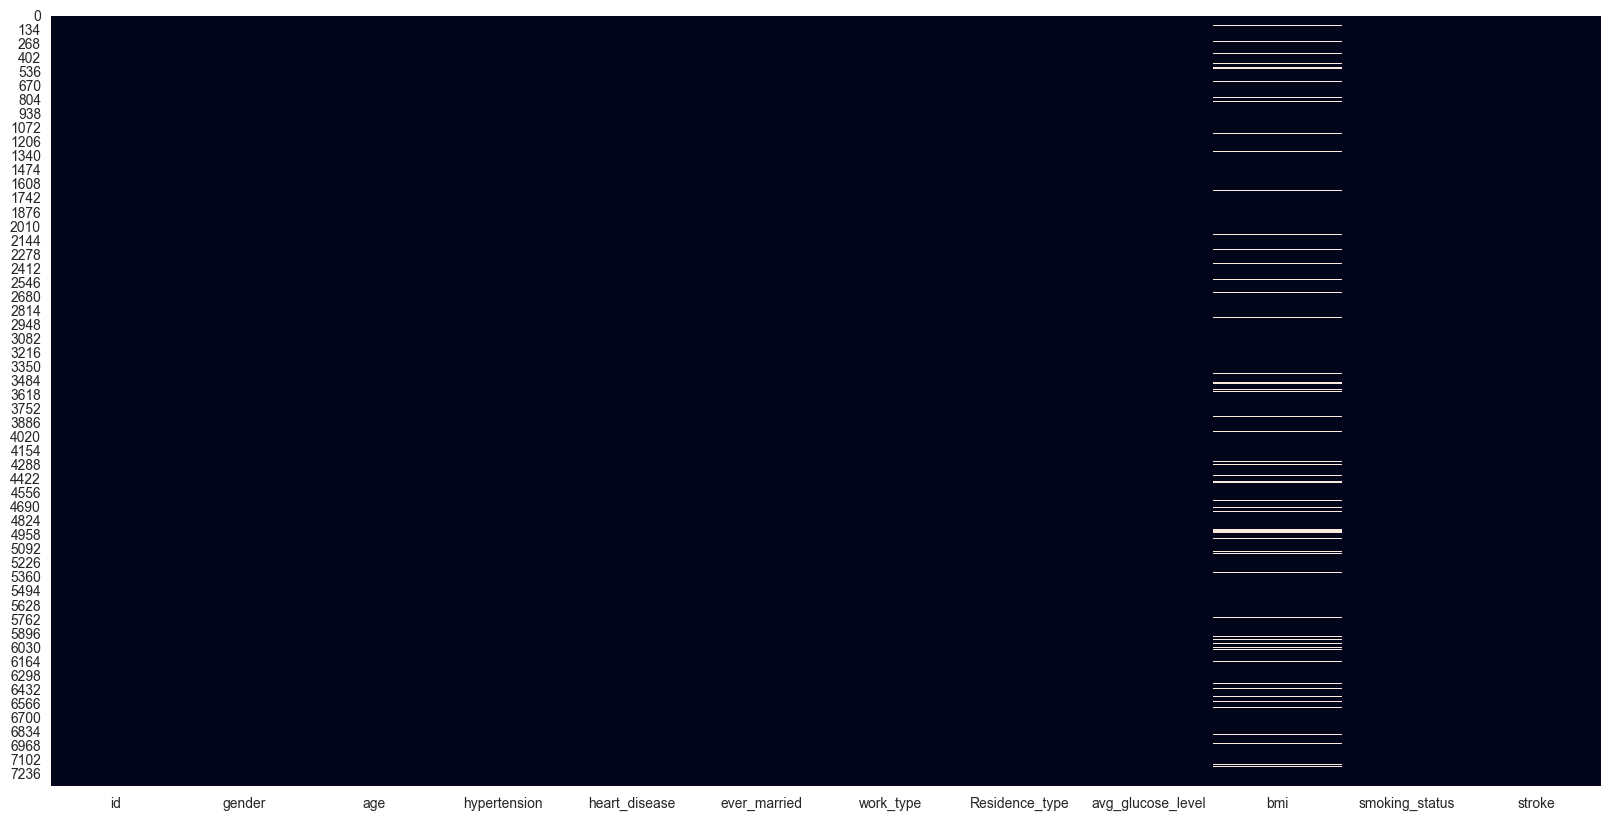

In [103]:
plt.figure(figsize=(20,10))
sns.heatmap(data.isna(), cbar=False)
plt.show()

In [104]:
#Filling the values with mean
data['bmi'].fillna(data['bmi'].mean(),inplace=True)

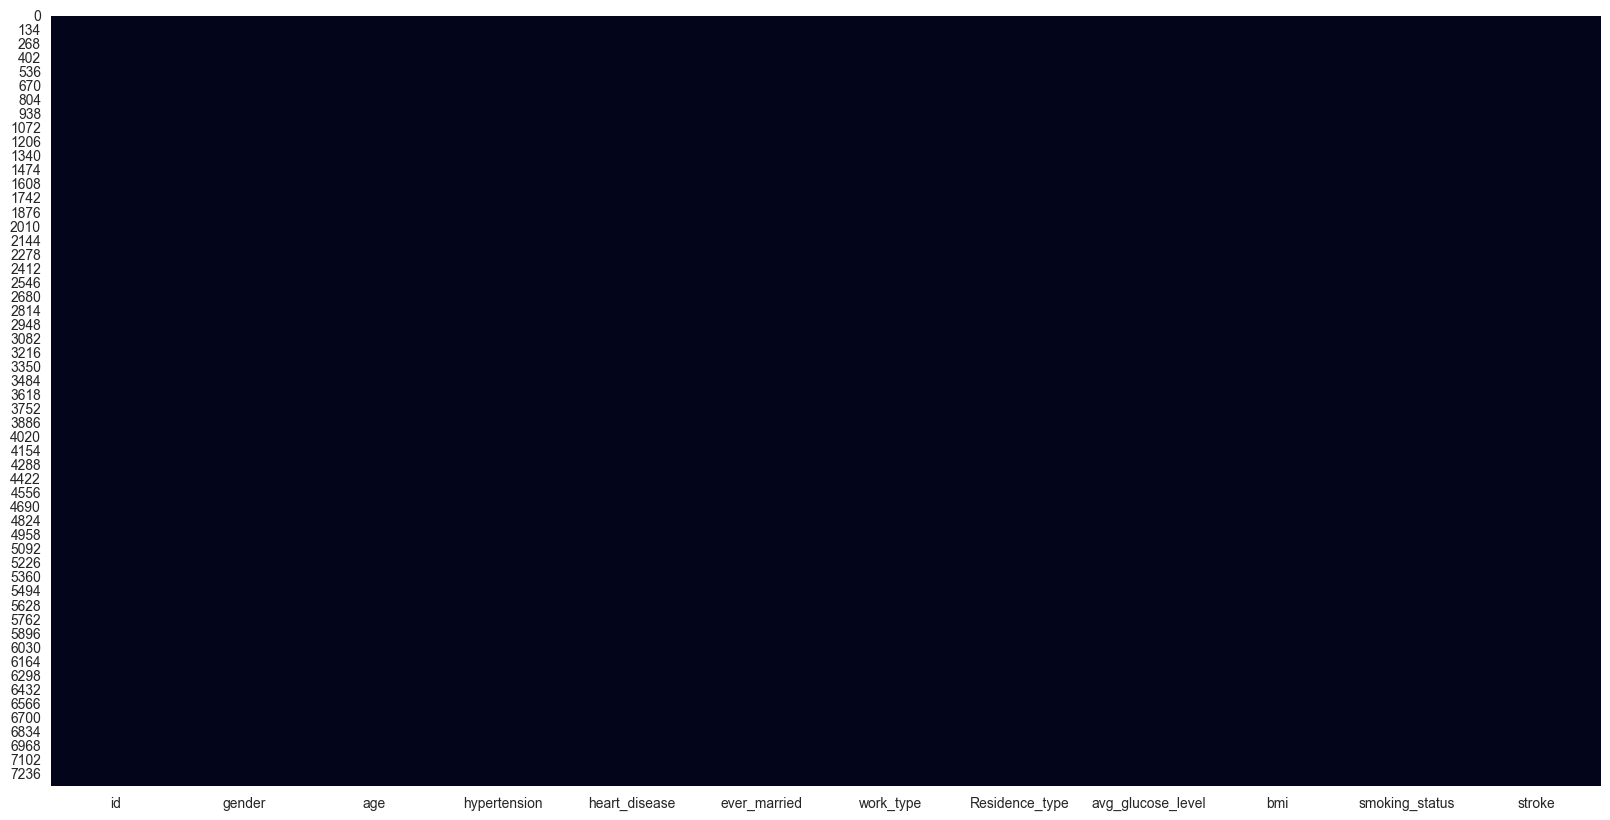

In [105]:
plt.figure(figsize=(20,10))
sns.heatmap(data.isna(), cbar=False)
plt.show()

### Dropping unnecessary columns

In [106]:
data.drop(columns=['id'],axis=1,inplace=True) 
data


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,57.0,1,0,Yes,Govt_job,Urban,78.92,27.700000,formerly smoked,1
1,Male,57.0,0,0,Yes,Private,Rural,70.16,25.800000,formerly smoked,0
2,Female,76.0,0,0,Yes,Private,Urban,207.28,34.900000,Unknown,1
3,Male,28.0,0,0,No,Private,Urban,256.74,23.400000,formerly smoked,0
4,Female,70.0,0,1,Yes,Private,Rural,239.07,26.100000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
7346,Female,66.0,0,0,Yes,Self-employed,Urban,101.45,29.330398,Unknown,1
7347,Male,61.0,1,0,Yes,Self-employed,Rural,76.11,27.300000,smokes,1
7348,Male,42.0,0,0,Yes,Private,Rural,83.41,25.400000,Unknown,1
7349,Female,27.0,0,0,No,Private,Urban,93.55,41.600000,never smoked,0


## 🔡 Encoding Categorical Variables

In [107]:
categorical = ['gender' ,'ever_married','work_type','Residence_type','smoking_status']
numerical = ['age', 'hypertension', 'heart_disease','avg_glucose_level', 'bmi']

In [108]:
print('work_type : ', data['work_type'].unique())
print('gender : ', data['gender'].unique())
print('Residence_type : ', data['Residence_type'].unique())
print('ever_married : ', data['ever_married'].unique())
print('smoking_status : ', data['smoking_status'].unique())

work_type :  ['Govt_job' 'Private' 'Self-employed' 'children' 'Never_worked']
gender :  ['Male' 'Female' 'Other']
Residence_type :  ['Urban' 'Rural']
ever_married :  ['Yes' 'No']
smoking_status :  ['formerly smoked' 'Unknown' 'never smoked' 'smokes']


In [109]:
from sklearn.preprocessing import LabelEncoder

# Creating an instance of LabelEncoder
le = LabelEncoder()

# Encoding each categorical column and printing the original and encoded values
for column in ['smoking_status', 'gender', 'ever_married', 'Residence_type', 'work_type','hypertension','heart_disease']:
    encoded_values = le.fit_transform(data[column])
    print(f"Original values for '{column}': {list(data[column].unique())}")
    print(f"Encoded values for '{column}': {list(le.transform(data[column].unique()))}\n")

Original values for 'smoking_status': ['formerly smoked', 'Unknown', 'never smoked', 'smokes']
Encoded values for 'smoking_status': [1, 0, 2, 3]

Original values for 'gender': ['Male', 'Female', 'Other']
Encoded values for 'gender': [1, 0, 2]

Original values for 'ever_married': ['Yes', 'No']
Encoded values for 'ever_married': [1, 0]

Original values for 'Residence_type': ['Urban', 'Rural']
Encoded values for 'Residence_type': [1, 0]

Original values for 'work_type': ['Govt_job', 'Private', 'Self-employed', 'children', 'Never_worked']
Encoded values for 'work_type': [0, 2, 3, 4, 1]

Original values for 'hypertension': [1, 0]
Encoded values for 'hypertension': [1, 0]

Original values for 'heart_disease': [0, 1]
Encoded values for 'heart_disease': [0, 1]



In [110]:
le=LabelEncoder() #creating an isntance of LabelEncoder class
smoking_status = le.fit_transform(data['smoking_status'])
gender = le.fit_transform(data['gender'])
ever_married = le.fit_transform(data['ever_married'])
Residence_type = le.fit_transform(data['Residence_type'])
work_type = le.fit_transform(data['work_type'])

In [111]:
#Replacing the above arrays in the data
data['work_type'] = work_type
data['gender'] = gender
data['Residence_type'] = Residence_type
data['ever_married'] = ever_married
data['smoking_status'] = smoking_status

In [112]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,57.0,1,0,1,0,1,78.92,27.7,1,1
1,1,57.0,0,0,1,2,0,70.16,25.8,1,0
2,0,76.0,0,0,1,2,1,207.28,34.9,0,1
3,1,28.0,0,0,0,2,1,256.74,23.4,1,0
4,0,70.0,0,1,1,2,0,239.07,26.1,2,1


In [113]:
data.nunique()

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   419
smoking_status          4
stroke                  2
dtype: int64

## 📊 Exploratory Data Analysis

### Correlation Heatmap

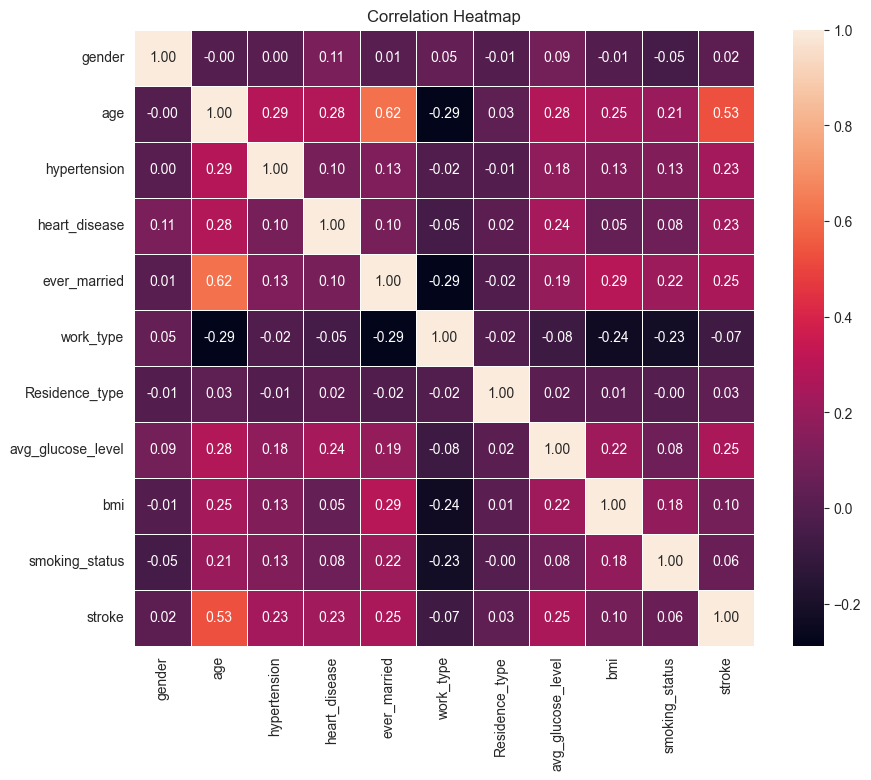

In [114]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### 📈 Univariate Analysis

In [115]:
print(data['gender'].value_counts())
print(data['work_type'].value_counts())
print(data['Residence_type'].value_counts())
print(data['ever_married'].value_counts())
print(data['smoking_status'].value_counts())
print(data['hypertension'].value_counts())
print(data['heart_disease'].value_counts())

0    4263
1    3087
2       1
Name: gender, dtype: int64
2    4266
3    1404
0     954
4     705
1      22
Name: work_type, dtype: int64
1    3811
0    3540
Name: Residence_type, dtype: int64
1    5333
0    2018
Name: ever_married, dtype: int64
2    2702
0    1967
1    1515
3    1167
Name: smoking_status, dtype: int64
0    6259
1    1092
Name: hypertension, dtype: int64
0    6652
1     699
Name: heart_disease, dtype: int64


In [116]:
gender = {"Female" : [2994], "Male" : [2115], "Other" : [1]}
wt = {"Private" : [2925], "Self-employed" : [819], "Children" : [687],'Govt job': [657], 'Never worked' : [22]}
rt = {"Urban" : [2596], "Rural" : [2514]}
evermarried = {"Yes" : [3353], "No" : [1757]}
smoke = {"Never smoked " : [1892], "Formerly smoked" : [885], "Smokes" : [789],"Unknown" : [1544]}
bp =  {"Yes " : [498], "No" : [4612]}
heartdisease= {"Yes " : [276], "No" : [4834]}
stroke = {"Yes " : [249], "No" : [4861]}

#### Gender Analysis

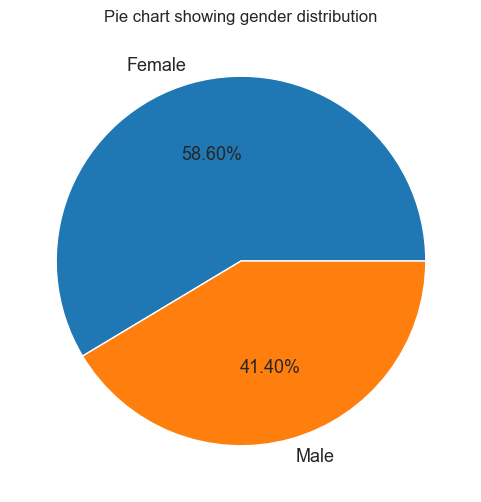

In [117]:
plt.figure(figsize = (6, 6))
temp = [2994,2115]
labels = ['Female','Male']
textprops = {"fontsize":13}
plt.pie(temp,labels=labels,autopct='%1.2f%%',textprops=textprops)
plt.title('Pie chart showing gender distribution')
plt.show()

#### Analysis of residence type

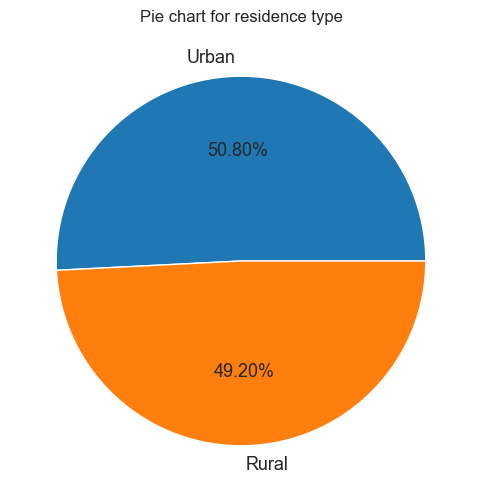

In [118]:
plt.figure(figsize = (6, 6))
temp = [2596,2514]
labels = ['Urban','Rural']
textprops = {"fontsize":13}
plt.pie(temp,labels=labels,autopct='%1.2f%%', textprops=textprops)
plt.title('Pie chart for residence type')
plt.show()

#### Analysis of ever married

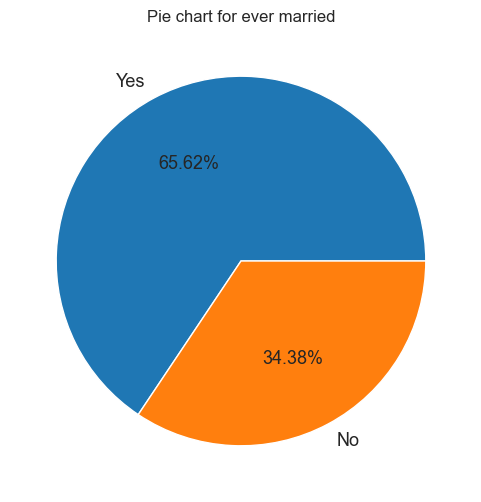

In [119]:
plt.figure(figsize = (6, 6))
temp = [3353,1757]
labels = ['Yes','No']
textprops = {"fontsize":13}
plt.pie(temp,labels=labels,autopct='%1.2f%%',textprops=textprops)
plt.title('Pie chart for ever married')
plt.show()

#### Work type analysis

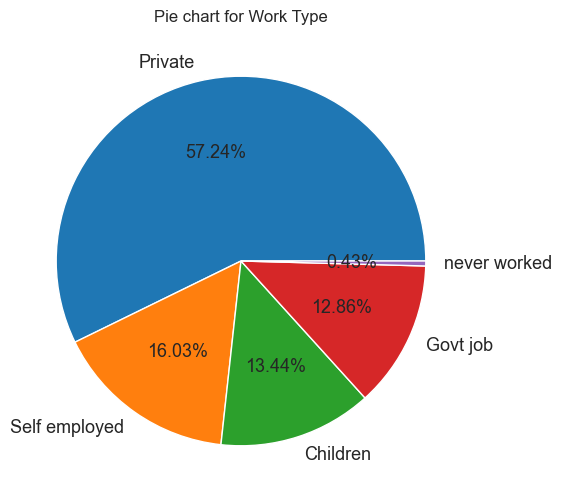

In [120]:
plt.figure(figsize=(6,6))
wt1 = [2925,819,687, 657, 22]
textprops = {"fontsize":13}
plt.pie(wt1,labels=['Private','Self employed', 'Children','Govt job','never worked'], autopct='%1.2f%%',textprops=textprops)
plt.title('Pie chart for Work Type')
plt.show()

#### Smoking status analysis

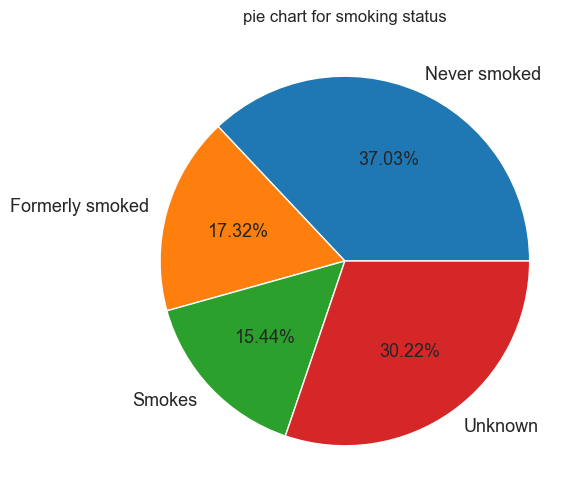

In [121]:
plt.figure(figsize = (6, 6))
temp = [1892,885,789,1544]
labels = ['Never smoked','Formerly smoked', 'Smokes','Unknown']
textprops = {"fontsize":13}
plt.pie(temp,labels=labels,autopct='%1.2f%%',textprops=textprops)
plt.title('pie chart for smoking status')
plt.show()

#### Graphs for heart disease and hypertension

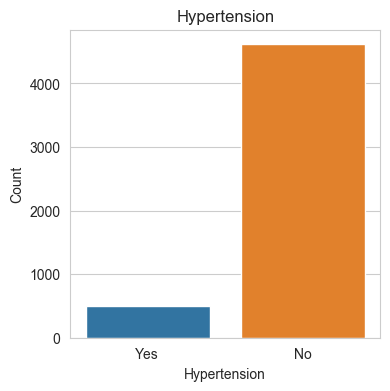

In [122]:
bp = pd.DataFrame(data= bp)
plt.figure(figsize = (4, 4))
bargraph = sns.barplot(data=bp)
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.title("Hypertension")
plt.show()

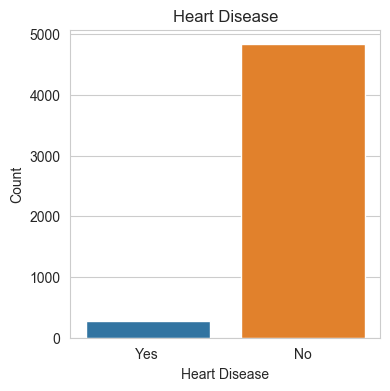

In [123]:
heartdisease = pd.DataFrame(data= heartdisease)
plt.figure(figsize = (4, 4))
bargraph = sns.barplot(data=heartdisease)
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.title("Heart Disease")
plt.show()

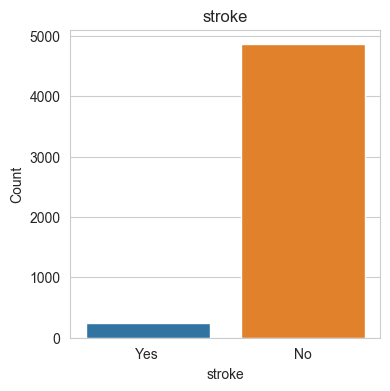

In [124]:
heartdisease = pd.DataFrame(data= stroke)
plt.figure(figsize = (4, 4))
bargraph = sns.barplot(data=stroke)
plt.xlabel('stroke')
plt.ylabel('Count')
plt.title("stroke")
plt.show()


### 📉 Bivariate Analysis

#### Age, BMI, Average glucose level vs Stroke

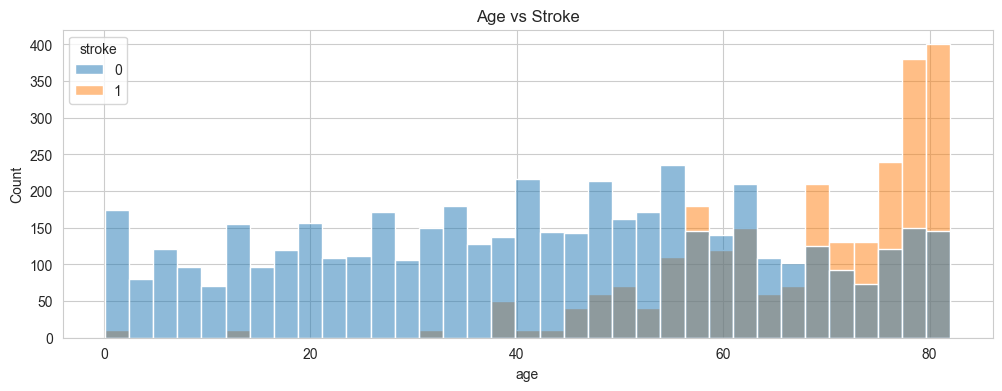

In [125]:
plt.figure(figsize=(12, 4))
pl = sns.histplot(x='age', data=data, hue='stroke', bins=35)
pl.set_title('Age vs Stroke')
plt.show()

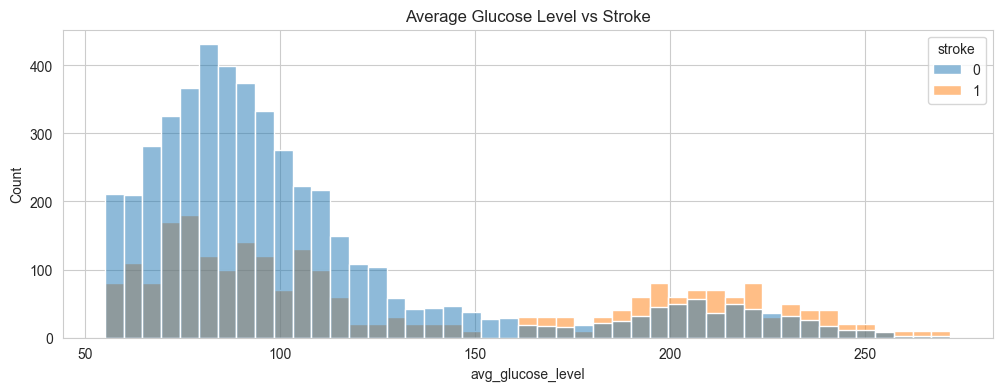

In [126]:
plt.figure(figsize=(12,4))
pl = sns.histplot(x='avg_glucose_level', data=data, hue='stroke', bins=45)
pl.set_title('Average Glucose Level vs Stroke')
plt.show()

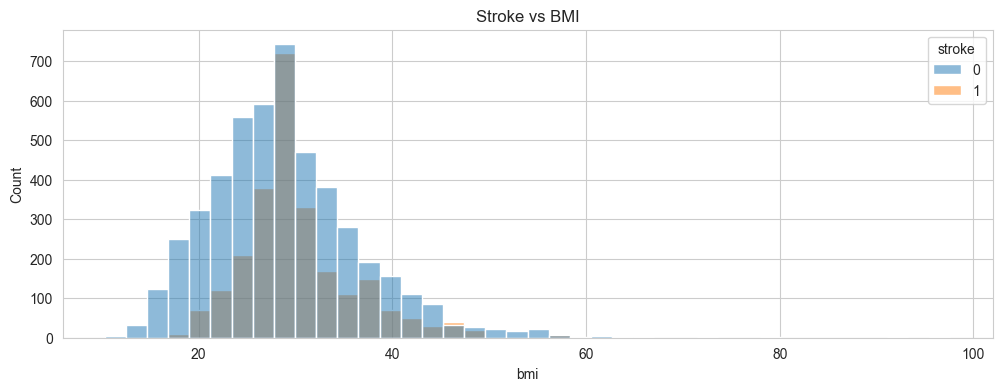

In [127]:
plt.figure(figsize=(12,4))
pl = sns.histplot(x='bmi', data=data, hue='stroke', bins=40)
pl.set_title('Stroke vs BMI')
plt.show()

### Countplots

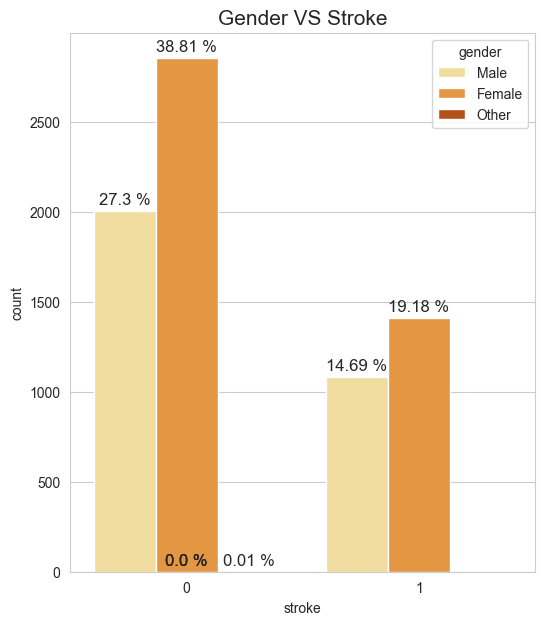

In [128]:
sns.set_style('whitegrid')
countplt, ax = plt.subplots(figsize = (6,7))
ax=sns.countplot(x=data['stroke'],hue=dataset['gender'],palette = 'YlOrBr')
ax.set_title("Gender VS Stroke",fontsize = 15)

for j in ax.patches:
        ax.annotate(f'{round(j.get_height()/len(dataset)*100,2)} %', xy=(j.get_x() + j.get_width() / 2,  
            j.get_height()), ha='center',  va='center',size=12, xytext=(0, 8),textcoords='offset points')
plt.show()

**Observations**
- Females make up the majority of the dataset (55.83% without stroke, 2.76% with stroke) compared to males (39.28% without stroke, 2.11% with stroke), though the proportion of strokes is relatively similar between genders, suggesting gender may not be a strong independent risk factor.

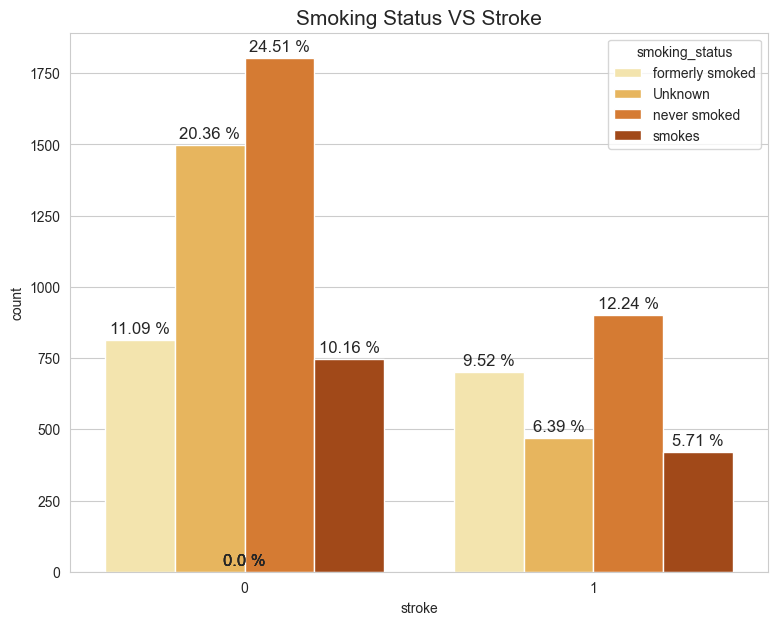

In [129]:
countplt, ax = plt.subplots(figsize = (9,7))
ax=sns.countplot(x=dataset['stroke'],hue=dataset['smoking_status'],palette = 'YlOrBr',)
ax.set_title("Smoking Status VS Stroke",fontsize = 15)
for p in ax.patches:
        ax.annotate(f'{round(p.get_height()/len(dataset)*100,2)} %', xy=(p.get_x() + p.get_width() / 2,  
            p.get_height()), ha='center',  va='center',size=12, xytext=(0, 8),textcoords='offset points')
plt.show()

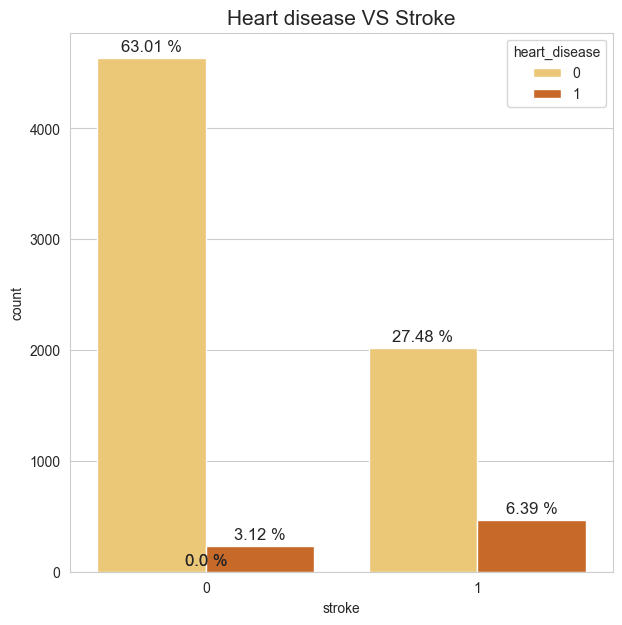

In [130]:
countplt, ax = plt.subplots(figsize = (7,7))
ax=sns.countplot(x=dataset['stroke'],hue=dataset['heart_disease'],palette = 'YlOrBr')
ax.set_title("Heart disease VS Stroke",fontsize = 15)
for p in ax.patches:
        ax.annotate(f'{round(p.get_height()/len(dataset)*100,2)} %', xy=(p.get_x() + p.get_width() / 2,  
            p.get_height()), ha='center',  va='center',size=12, xytext=(0, 8),textcoords='offset points')
plt.show()

**Observations**
- The majority of people without heart disease (90.65%) also don't have strokes (0). Among those with heart disease (1), there are relatively low stroke rates (0.92%). However, having heart disease appears to be associated with a slightly higher stroke risk compared to those without heart disease.

Text(0.5, 1.0, 'Residence Type VS Stroke')

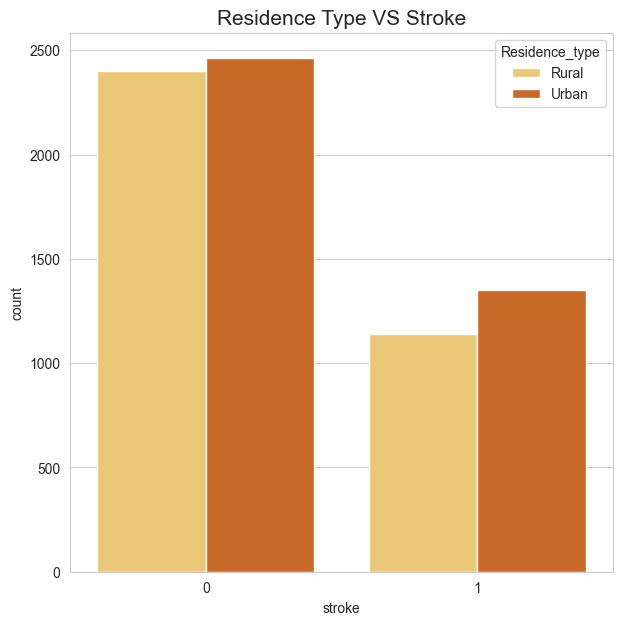

In [131]:
countplt, ax = plt.subplots(figsize = (7,7))
ax=sns.countplot(x=dataset['stroke'],hue=dataset['Residence_type'],palette = 'YlOrBr')
ax.set_title("Residence Type VS Stroke",fontsize = 15)

**Observations**
- The distribution between urban and rural residents is fairly even for both stroke and non-stroke groups, suggesting that residence type may not be a strong predictor of stroke risk. The overall stroke prevalence is notably lower than non-stroke cases in both residential settings.

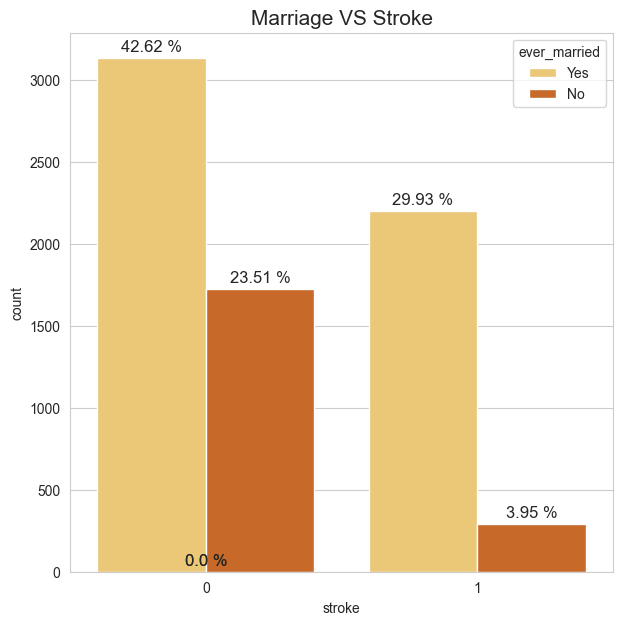

In [132]:
countplt, ax = plt.subplots(figsize = (7,7))
ax=sns.countplot(x=dataset['stroke'],hue=dataset['ever_married'],palette = 'YlOrBr')
ax.set_title("Marriage VS Stroke",fontsize = 15)
for p in ax.patches:
        ax.annotate(f'{round(p.get_height()/len(dataset)*100,2)} %', xy=(p.get_x() + p.get_width() / 2,  
            p.get_height()), ha='center',  va='center',size=12, xytext=(0, 8),textcoords='offset points')
plt.show()

**Observations**
* Among those without stroke (0), there's a notably higher percentage of married people (61.31%) compared to unmarried people (33.82%). For those who had a stroke (1), the percentages are much lower but still show higher rates among married people (4.31%) compared to unmarried (0.57%).

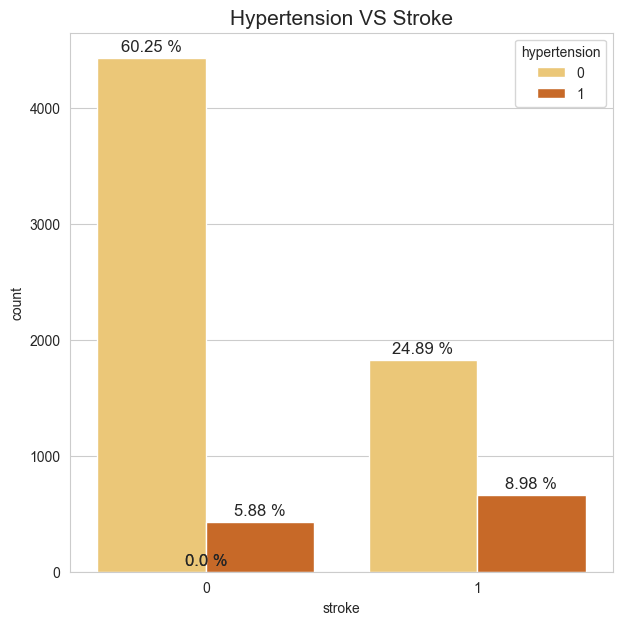

In [133]:
countplt, ax = plt.subplots(figsize = (7,7))
ax=sns.countplot(x=dataset['stroke'],hue=dataset['hypertension'],palette = 'YlOrBr')
ax.set_title("Hypertension VS Stroke",fontsize = 15)

for p in ax.patches:
        ax.annotate(f'{round(p.get_height()/len(dataset)*100,2)} %', xy=(p.get_x() + p.get_width() / 2,  
            p.get_height()), ha='center',  va='center',size=12, xytext=(0, 8),textcoords='offset points')
plt.show()

**Observation**
* People without hypertension (0) make up the largest group (86.67%) and mostly don't have strokes. Those with hypertension (1) show a higher relative risk of stroke (1.29%) compared to those without hypertension (3.58% without stroke), suggesting hypertension might be a risk factor for stroke.

## 🔍  Exploring need for oversampling

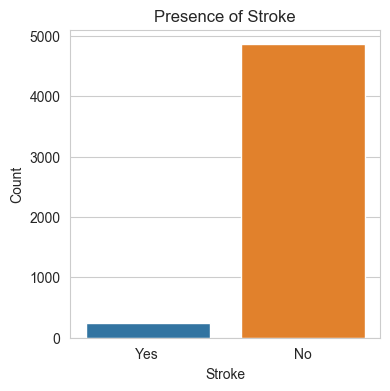

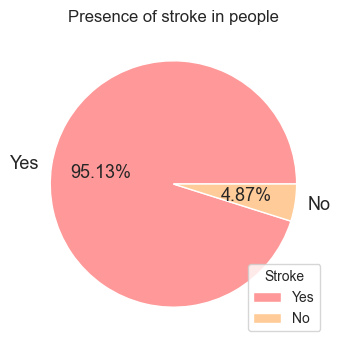

In [134]:
stroke = pd.DataFrame(stroke)
plt.figure(figsize = (4, 4))
bargraph = sns.barplot(data=stroke)
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.title("Presence of Stroke")
plt.show()


plt.figure(figsize = (4, 4))
temp = [4861,249]
labels = ['Yes','No']
colors = ['#ff9999','#ffcc99'] 
textprops = {"fontsize":13}
plt.pie(temp,labels=labels,autopct='%1.2f%%', colors = colors,textprops = textprops )
plt.title('Presence of stroke in people')
plt.legend(title = "Stroke")
plt.show()

In [135]:
print((data['stroke']).value_counts())

0    4861
1    2490
Name: stroke, dtype: int64


In [136]:
print("The number of positive cases is : 249")
print("The number of negative cases is : 4861")
print("The percentage of positive cases is :", 249/5110*100)

The number of positive cases is : 249
The number of negative cases is : 4861
The percentage of positive cases is : 4.87279843444227


## 𐄷 Oversampling using SMOTE

In [137]:
data1 = data.copy()
X = data.drop('stroke', axis = 1)
Y = data['stroke']
Y = pd.DataFrame(Y)


In [138]:

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 10)
X1, Y1 = smote.fit_resample(X, Y)

In [139]:
Y.value_counts()

stroke
0         4861
1         2490
dtype: int64

In [140]:
Y1 = pd.DataFrame(Y1)
X1 = pd.DataFrame(X1)
Y1.value_counts()

stroke
0         4861
1         4861
dtype: int64

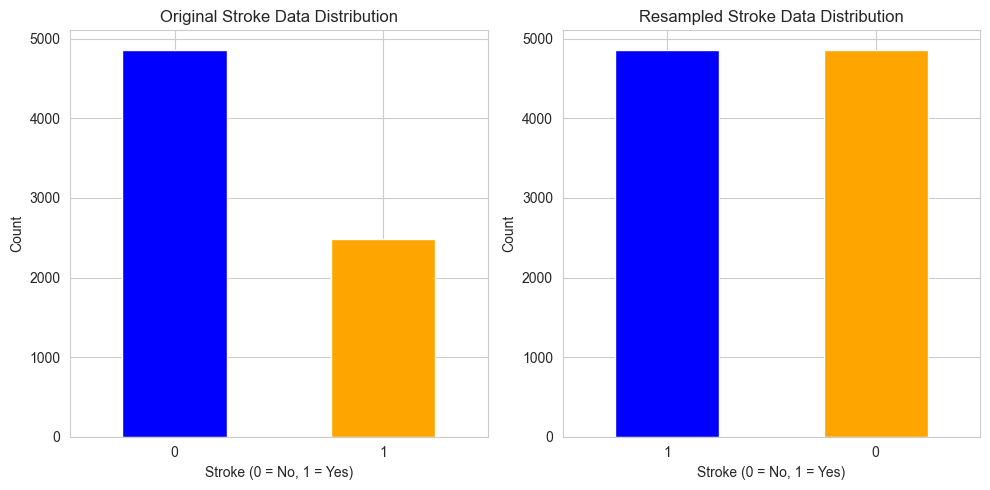

In [141]:
import matplotlib.pyplot as plt

# Original class distribution
original_counts = Y['stroke'].value_counts()

# After SMOTE class distribution
resampled_counts = Y1['stroke'].value_counts()

# Create a bar plot to compare the distributions
plt.figure(figsize=(10, 5))

# Plot original data distribution
plt.subplot(1, 2, 1)
original_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Original Stroke Data Distribution')
plt.xlabel('Stroke (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Plot resampled data distribution
plt.subplot(1, 2, 2)
resampled_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Resampled Stroke Data Distribution')
plt.xlabel('Stroke (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


In [142]:
X1

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,57.0,1,0,1,0,1,78.92,27.700000,1
1,1,57.0,0,0,1,2,0,70.16,25.800000,1
2,0,76.0,0,0,1,2,1,207.28,34.900000,0
3,1,28.0,0,0,0,2,1,256.74,23.400000,1
4,0,70.0,0,1,1,2,0,239.07,26.100000,2
...,...,...,...,...,...,...,...,...,...,...
9717,1,60.0,0,1,1,2,1,91.92,35.900000,3
9718,1,81.0,0,0,1,3,0,91.54,31.400000,2
9719,1,68.0,0,0,1,3,1,77.82,27.500000,3
9720,1,78.0,1,0,1,3,1,93.13,29.330398,1


In [143]:
X1.columns = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type','Residence_type', 'avg_glucose_level','bmi','smoking_status']
X1

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,57.0,1,0,1,0,1,78.92,27.700000,1
1,1,57.0,0,0,1,2,0,70.16,25.800000,1
2,0,76.0,0,0,1,2,1,207.28,34.900000,0
3,1,28.0,0,0,0,2,1,256.74,23.400000,1
4,0,70.0,0,1,1,2,0,239.07,26.100000,2
...,...,...,...,...,...,...,...,...,...,...
9717,1,60.0,0,1,1,2,1,91.92,35.900000,3
9718,1,81.0,0,0,1,3,0,91.54,31.400000,2
9719,1,68.0,0,0,1,3,1,77.82,27.500000,3
9720,1,78.0,1,0,1,3,1,93.13,29.330398,1


In [144]:
Y1

,stroke
0,1
1,0
2,1
3,0
4,1
...,...
9717,1
9718,1
9719,1
9720,1


## ✂️ Training and test split

In [145]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X1,Y1,test_size=0.2 ,random_state = 105)

In [146]:
Y_train.value_counts()

stroke
0         3889
1         3888
dtype: int64

## 🤖 Model Training

### 1. Naive Bayes

In [147]:
NB = GaussianNB()
NB.fit(X_train, Y_train)
Y_pred_NB = NB.predict(X_test)
NB_accuracy = accuracy_score(Y_test,Y_pred_NB)
print(NB_accuracy*100,'%')



74.70437017994858 %


              precision    recall  f1-score   support

           0       0.75      0.74      0.74       972
           1       0.74      0.76      0.75       973

    accuracy                           0.75      1945
   macro avg       0.75      0.75      0.75      1945
weighted avg       0.75      0.75      0.75      1945



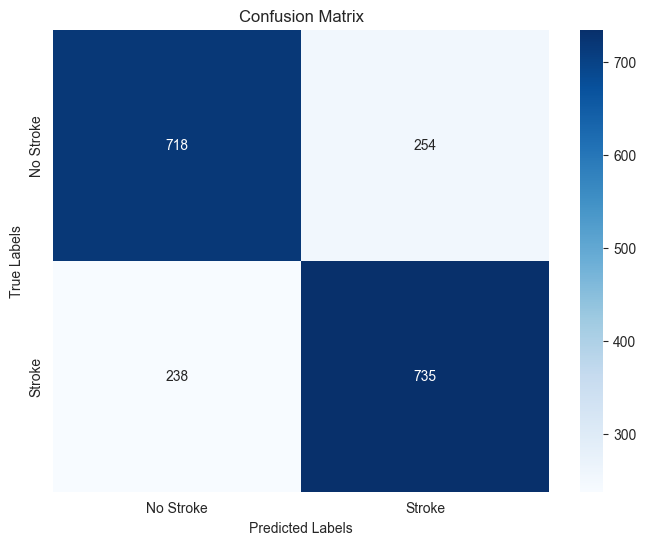

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

# Calculate the confusion matrix
CM = confusion_matrix(Y_test, Y_pred_NB)

print(classification_report(Y_test, Y_pred_NB))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(CM, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


roc_auc_score for Gaussian Naive Bayes:  0.8107672592085061


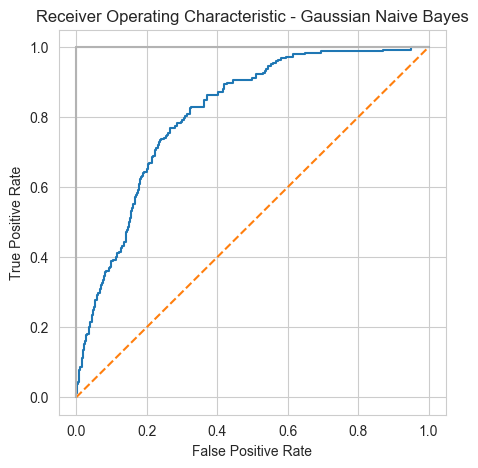

In [149]:
y_score_NB = NB.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y_test, y_score_NB)
print('roc_auc_score for Gaussian Naive Bayes: ', roc_auc_score(Y_test, y_score_NB))
plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic - Gaussian Naive Bayes')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


### 2. Logistic Regression

In [150]:
LR = LogisticRegression()
LR.fit(X_train,Y_train)
Y_Res_LR=LR.predict(X_test)
LR_Accuracy = accuracy_score(Y_test, Y_Res_LR)
print(LR_Accuracy*100,'%')

75.83547557840618 %


              precision    recall  f1-score   support

           0       0.78      0.72      0.75       972
           1       0.74      0.79      0.77       973

    accuracy                           0.76      1945
   macro avg       0.76      0.76      0.76      1945
weighted avg       0.76      0.76      0.76      1945



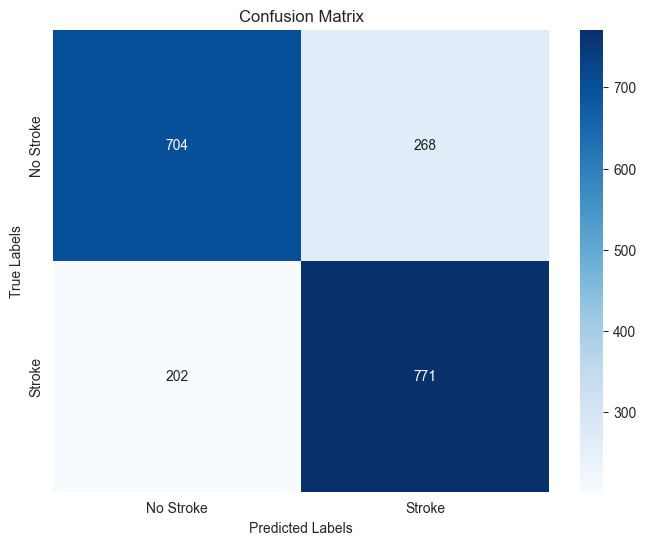

In [151]:
# Calculate the confusion matrix
CM = confusion_matrix(Y_test, Y_Res_LR)
print(classification_report(Y_test, Y_Res_LR))
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(CM, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


roc_auc_score for Logistic Regression:  0.8356669162024879


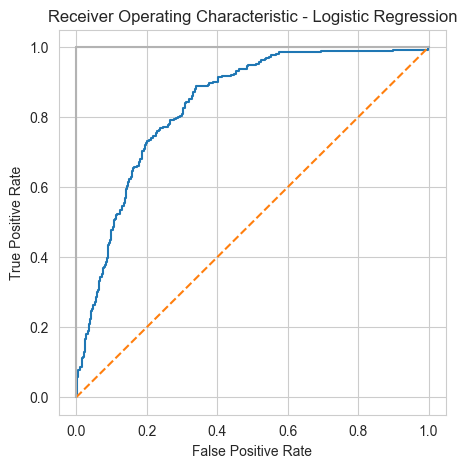

In [152]:
y_score_LR = LR.predict_proba(X_test)[:,1]
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(Y_test, y_score_LR)
print('roc_auc_score for Logistic Regression: ', roc_auc_score(Y_test, y_score_LR))
plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 3. Decision Tree Classifier

In [153]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train,Y_train)


DecisionTreeClassifier()

In [154]:
print(DTC.feature_importances_)
print(X_train.columns)

[0.00788279 0.48321411 0.01905803 0.01126148 0.01341686 0.04253568
 0.00958373 0.16296018 0.1871201  0.06296703]
Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')


In [155]:
Y_pred_DTC = DTC.predict(X_test)
DTC_Accuracy = accuracy_score(Y_test, Y_pred_DTC)
print(DTC_Accuracy*100,'%')

96.91516709511568 %


In [156]:
imp_feature = {"Features" : [ 'age','Residence_type', 'hypetension','avg_glucose_level','smoking_status','work_type','heart_disease','bmi','ever_married','gender'],
         'values' : [0.4406506, 0.0940964,0.08614509, 0.07980055, 0.07281029,0.05769702,0.04967563,0.04671055,0.03678735,0.03562653]}                
imp_feature = pd.DataFrame(data=imp_feature)
imp_feature

,Features,values
0,age,0.440651
1,Residence_type,0.094096
2,hypetension,0.086145
3,avg_glucose_level,0.079801
4,smoking_status,0.072810
5,work_type,0.057697
6,heart_disease,0.049676
7,bmi,0.046711
8,ever_married,0.036787
9,gender,0.035627


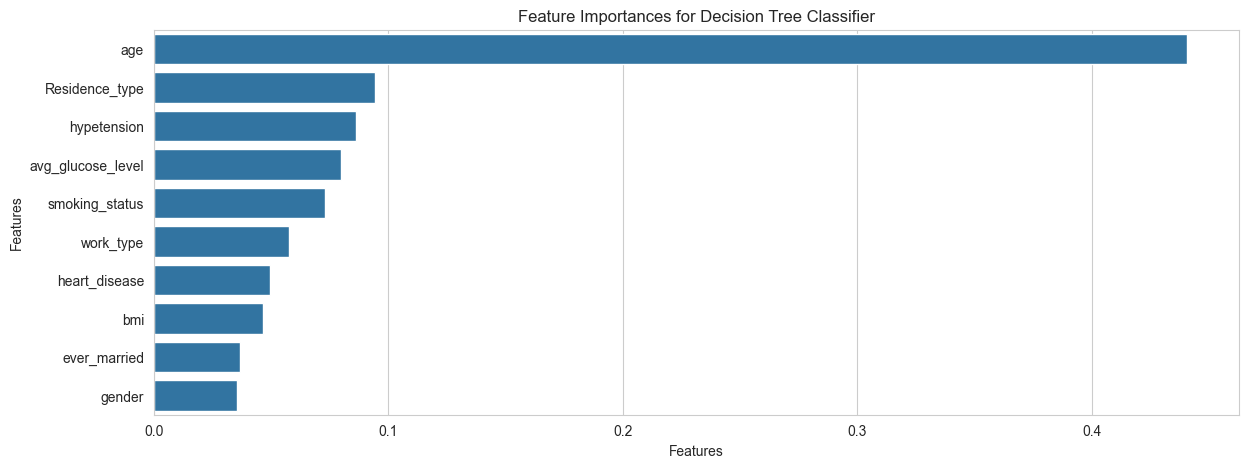

In [157]:
plt.figure(figsize = (14, 5))
bargraph = sns.barplot(x=imp_feature['values'], y = imp_feature['Features'], data=imp_feature)
plt.xlabel('Features')
plt.title("Feature Importances for Decision Tree Classifier")
plt.show()



              precision    recall  f1-score   support

           0       1.00      0.94      0.97       972
           1       0.94      1.00      0.97       973

    accuracy                           0.97      1945
   macro avg       0.97      0.97      0.97      1945
weighted avg       0.97      0.97      0.97      1945



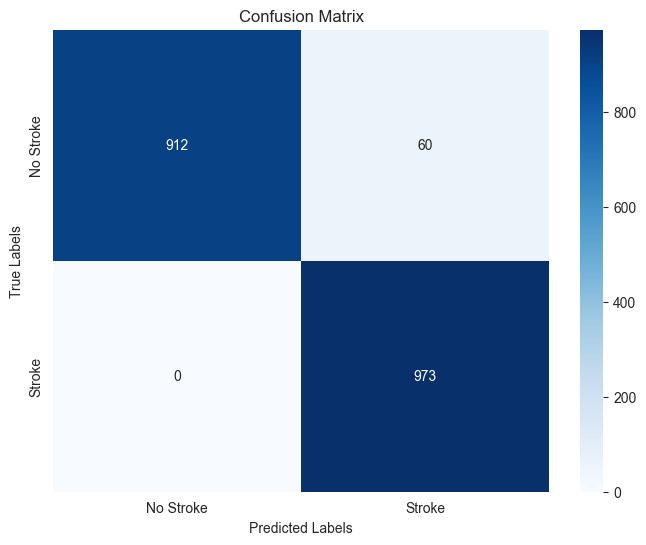

In [158]:
# Calculate the confusion matrix
CM = confusion_matrix(Y_test, Y_pred_DTC)

print(classification_report(Y_test, Y_pred_DTC))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(CM, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


roc_auc_score for Decision Tree Classifier:  0.9691358024691358


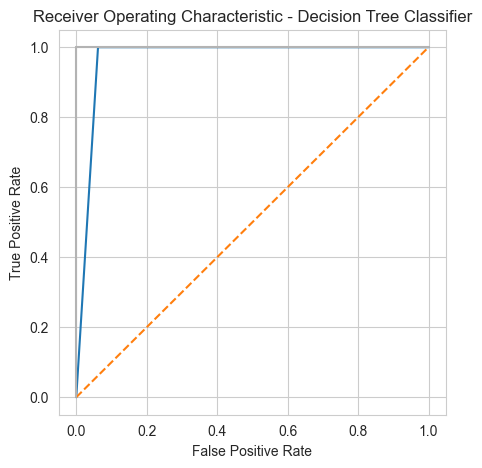

In [159]:
y_score_DTC = DTC.predict_proba(X_test)[:,1]
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(Y_test, y_score_DTC)
print('roc_auc_score for Decision Tree Classifier: ', roc_auc_score(Y_test, y_score_DTC))
plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic - Decision Tree Classifier')
plt.plot(false_positive_rate3, true_positive_rate3)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 4. KNN

In [160]:
KNN_clf = KNeighborsClassifier()
KNN_clf.fit(X_train,Y_train)
Y_Res_KNN=KNN_clf.predict(X_test)
KNN_Accuracy = accuracy_score(Y_test, Y_Res_KNN)
print(KNN_Accuracy*100,'%')

92.69922879177378 %


              precision    recall  f1-score   support

           0       1.00      0.85      0.92       972
           1       0.87      1.00      0.93       973

    accuracy                           0.93      1945
   macro avg       0.94      0.93      0.93      1945
weighted avg       0.94      0.93      0.93      1945



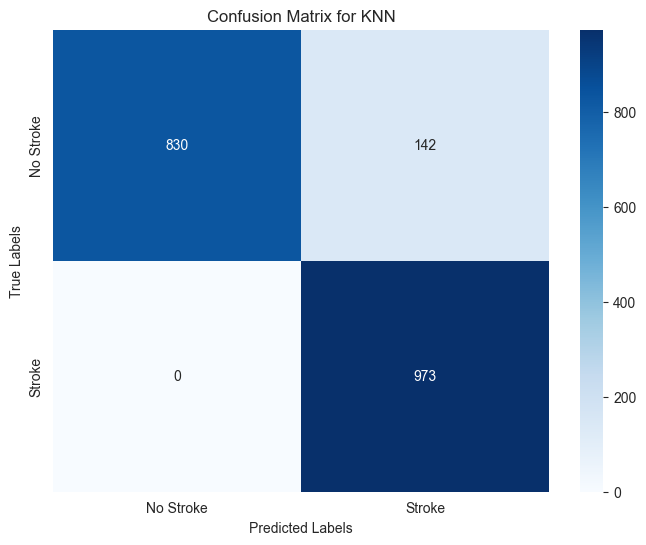

In [161]:
# Calculate the confusion matrix
CM = confusion_matrix(Y_test, Y_Res_KNN)

print(classification_report(Y_test, Y_Res_KNN))
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(CM, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


roc_auc_score for K Nearest Neighbour is:  0.9675925925925926


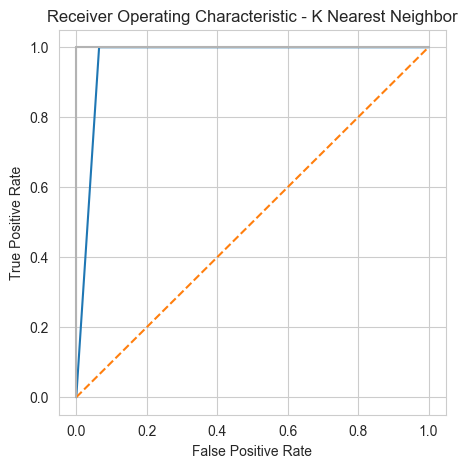

In [162]:
y_score_KNN = KNN_clf.predict_proba(X_test)[:,1]
false_positive_rate4, true_positive_rate4, threshold4 = roc_curve(Y_test, y_score_KNN)
print('roc_auc_score for K Nearest Neighbour is: ', roc_auc_score(Y_test, y_score_KNN))
plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic - K Nearest Neighbor')
plt.plot(false_positive_rate4, true_positive_rate4)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 5. AdaBoost Classifier

In [163]:
ADC = AdaBoostClassifier()
ADC.fit(X_train,Y_train)
Y_pred_ADC = ADC.predict(X_test)
ADC_Accuracy = accuracy_score(Y_test,Y_pred_ADC)
print(ADC_Accuracy*100,"%")


79.17737789203085 %


              precision    recall  f1-score   support

           0       0.83      0.73      0.78       972
           1       0.76      0.86      0.80       973

    accuracy                           0.79      1945
   macro avg       0.80      0.79      0.79      1945
weighted avg       0.80      0.79      0.79      1945



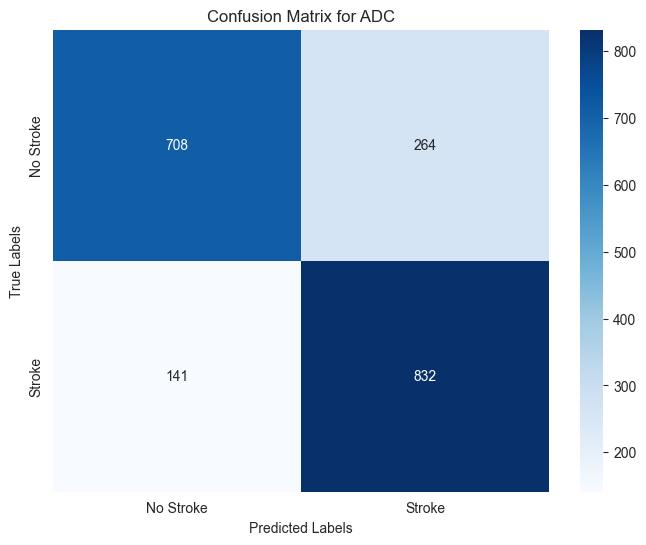

In [164]:
# Calculate the confusion matrix
CM = confusion_matrix(Y_test, Y_pred_ADC)


print(classification_report(Y_test, Y_pred_ADC))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(CM, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title('Confusion Matrix for ADC')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


roc_auc_score for AdaBoost is:  0.8647441834891875


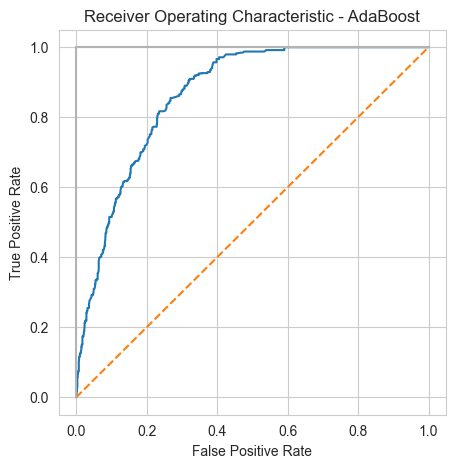

In [165]:
y_score_ADC = ADC.predict_proba(X_test)[:,1]
false_positive_rate5, true_positive_rate5, threshold5 = roc_curve(Y_test, y_score_ADC)
print('roc_auc_score for AdaBoost is: ', roc_auc_score(Y_test, y_score_ADC))
plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic - AdaBoost')
plt.plot(false_positive_rate5, true_positive_rate5)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 6. Random Forest Classifier

In [166]:
RF = RandomForestClassifier(n_estimators=1000, random_state=47 , n_jobs = 3)
RF.fit(X_train,Y_train)
Y_Res_RF=RF.predict(X_test)
RF_Accuracy = accuracy_score(Y_test, Y_Res_RF)
print(RF_Accuracy*100,'%')

99.02313624678663 %


              precision    recall  f1-score   support

           0       1.00      0.98      0.99       972
           1       0.98      1.00      0.99       973

    accuracy                           0.99      1945
   macro avg       0.99      0.99      0.99      1945
weighted avg       0.99      0.99      0.99      1945

specificity = 0.9804526748971193


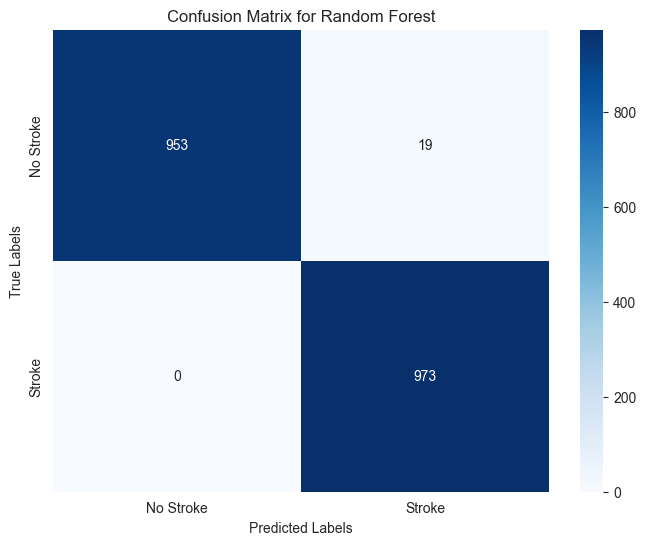

In [167]:
# Calculate the confusion matrix
CM = confusion_matrix(Y_test, Y_Res_RF)
print(classification_report(Y_test, Y_Res_RF))
print("specificity =", CM[0][0]/(CM[0][0]+CM[0][1]))
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(CM, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


roc_auc_score for XGBoost is:  1.0


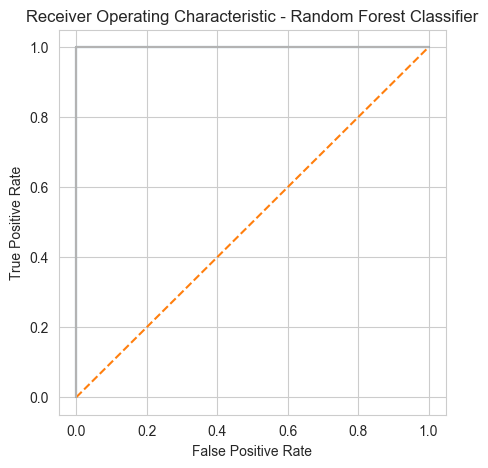

In [168]:
y_score_RF = RF.predict_proba(X_test)[:,1]
false_positive_rate7, true_positive_rate7, threshold7 = roc_curve(Y_test, y_score_RF)
print('roc_auc_score for XGBoost is: ', roc_auc_score(Y_test, y_score_RF))
plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic - Random Forest Classifier')
plt.plot(false_positive_rate7, true_positive_rate7)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 7. XGBoost

In [169]:
XG_classifier = XGBClassifier()
XG_classifier.fit(X_train, Y_train)
Y_pred_xg = XG_classifier.predict(X_test)
XG_Accuracy = accuracy_score(Y_test,Y_pred_xg)
print(XG_Accuracy*100,"%")

97.37789203084833 %


In [170]:
features = X_train.columns
importances = XG_classifier.feature_importances_
print(features)
print(importances)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')
[0.06780975 0.31076384 0.09226825 0.0669428  0.08468463 0.07496186
 0.04620044 0.08247995 0.08809969 0.08578882]


In [171]:
imp_feature_xg = {'features' : ['age','Residence_type', 'gender','hypertension','work_type','heart_disease','smoking_status','ever_married','bmi', 'avg_glucose_level'] , 'values' : [ 0.20928001,0.16508496,0.1434009,0.10393379,0.10006149,0.09203752,0.08475993,0.06718082,0.02110756,0.01315293]}
imp_feature_xg = pd.DataFrame(imp_feature_xg)


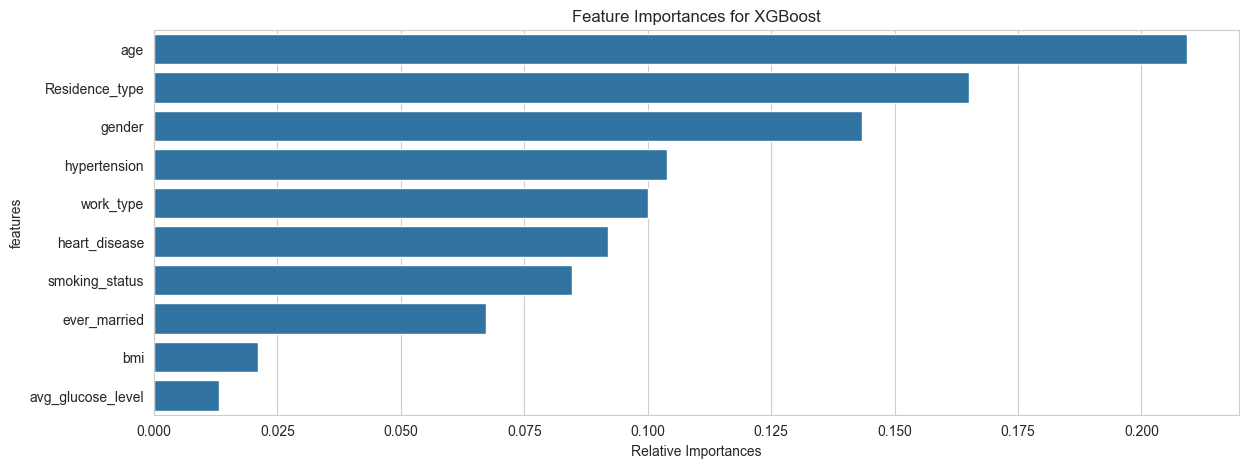

In [172]:
plt.figure(figsize = (14, 5))
bargraph = sns.barplot(x=imp_feature_xg['values'], y = imp_feature_xg['features'], data=imp_feature_xg)
plt.xlabel('Relative Importances')
plt.title("Feature Importances for XGBoost")
plt.show()


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97       972
           1       0.95      1.00      0.97       973

    accuracy                           0.97      1945
   macro avg       0.98      0.97      0.97      1945
weighted avg       0.98      0.97      0.97      1945



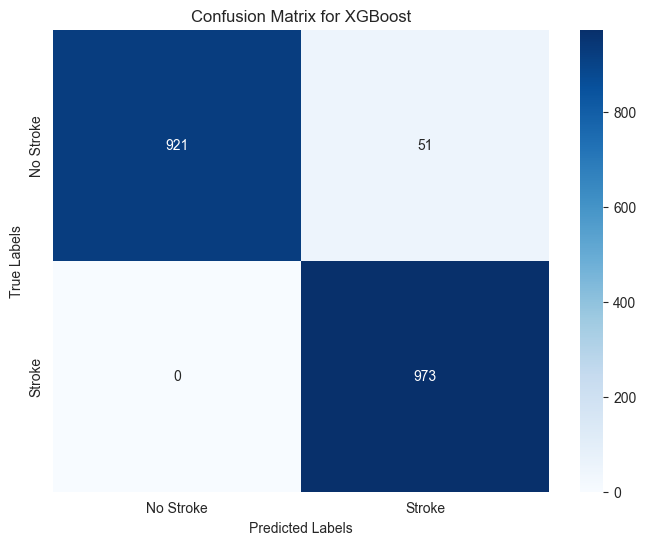

In [173]:

# Calculate the confusion matrix
CM = confusion_matrix(Y_test, Y_pred_xg)

# Print the classification report
print("\nClassification Report:\n", classification_report(Y_test, Y_pred_xg))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(CM, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title('Confusion Matrix for XGBoost')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


roc_auc_score for XGBoost is:  0.9972022382094324


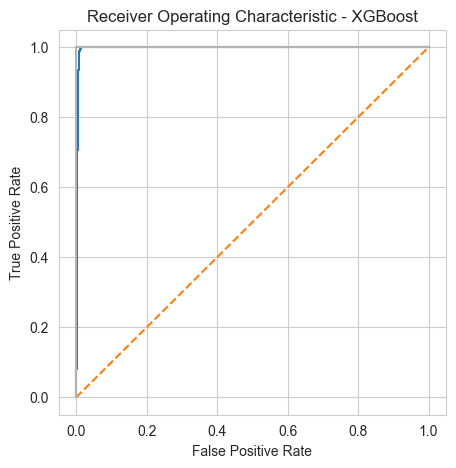

In [174]:
y_score_xg = XG_classifier.predict_proba(X_test)[:,1]
false_positive_rate6, true_positive_rate6, threshold6 = roc_curve(Y_test, y_score_xg)
print('roc_auc_score for XGBoost is: ', roc_auc_score(Y_test, y_score_xg))
plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic - XGBoost')
plt.plot(false_positive_rate6, true_positive_rate6)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 📋 Model Evaluation

In [175]:
A = {'Models' : ['Gaussian Naive Bayes','Logistic Regression', 'Decision Tree Classifier', 'K Nearest Neighbors', 'AdaBoost','XGBoost', 'Random Forest Classifier'],'AUC Scores' :[ roc_auc_score(Y_test, y_score_NB), roc_auc_score(Y_test, y_score_LR), roc_auc_score(Y_test, y_score_DTC), roc_auc_score(Y_test, y_score_KNN), roc_auc_score(Y_test, y_score_ADC), roc_auc_score(Y_test, y_score_xg), roc_auc_score(Y_test, y_score_RF)]}
A = pd.DataFrame(A)
A

,Models,AUC Scores
0,Gaussian Naive Bayes,0.810767
1,Logistic Regression,0.835667
2,Decision Tree Classifier,0.969136
3,K Nearest Neighbors,0.967593
4,AdaBoost,0.864744
5,XGBoost,0.997202
6,Random Forest Classifier,1.000000


# Model Selection : XGBoost

In [176]:
model = XGBClassifier()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
print(f'Training Accuracy: {accuracy_score(Y_train, model.predict(X_train))}')
print(f'Testing Accuracy: {accuracy_score(Y_test, y_pred)}')

Training Accuracy: 0.9980712356949981
Testing Accuracy: 0.9737789203084833


In [177]:
def predict_stroke(features):
    """
    Predicts the likelihood of a stroke given input features.

    Parameters:
    - features: List or array of input features in the following order:
      [age, hypertension, heart_disease, avg_glucose_level, bmi, gender, ever_married, work_type, Residence_type, smoking_status]

    Returns:
    - Prediction: 1 if stroke is likely, 0 otherwise.
    """
    # Ensure the input is a NumPy array
    features = np.array(features).reshape(1, -1)
    # Make the prediction
    prediction = model.predict(features)
    
    return prediction[0]

# Example usage with real data
example_features = X.iloc[1].tolist()  # Take the first row as an example
result = predict_stroke(example_features)
print("Stroke prediction:", "Yes the patient risk to have a stroke" if result == 1 else "No the patient should be clean")

Stroke prediction: No the patient should be clean


In [178]:
import numpy as np

def predict_stroke(features):
    """
    Predicts the likelihood of a stroke given input features.

    Parameters:
    - features: List or array of input features in the following order:
      [age, hypertension, heart_disease, avg_glucose_level, bmi, gender, ever_married, work_type, Residence_type, smoking_status]

    Returns:
    - Prediction: 1 if stroke is likely, 0 otherwise.
    """
    # Ensure the input is a NumPy array
    features = np.array(features).reshape(1, -1)
    # Make the prediction
    prediction = model.predict(features)
    
    return prediction[0]

# Loop through all cases and print predictions
for index in range(len(X)):
    case_features = X.iloc[index].tolist()  # Extract features for the current row
    result = predict_stroke(case_features)
    print(f"Case {index}: {'Yes, the patient is at risk for a stroke' if result == 1 else 'No, the patient is not at risk for a stroke'}")


Case 0: Yes, the patient is at risk for a stroke
Case 1: No, the patient is not at risk for a stroke
Case 2: Yes, the patient is at risk for a stroke
Case 3: No, the patient is not at risk for a stroke
Case 4: Yes, the patient is at risk for a stroke
Case 5: Yes, the patient is at risk for a stroke
Case 6: No, the patient is not at risk for a stroke
Case 7: No, the patient is not at risk for a stroke
Case 8: Yes, the patient is at risk for a stroke
Case 9: Yes, the patient is at risk for a stroke
Case 10: No, the patient is not at risk for a stroke
Case 11: No, the patient is not at risk for a stroke
Case 12: No, the patient is not at risk for a stroke
Case 13: No, the patient is not at risk for a stroke
Case 14: No, the patient is not at risk for a stroke
Case 15: No, the patient is not at risk for a stroke
Case 16: Yes, the patient is at risk for a stroke
Case 17: No, the patient is not at risk for a stroke
Case 18: No, the patient is not at risk for a stroke
Case 19: No, the patient

In [179]:

def predict_stroke(gender,age, hypertension, heart_disease,ever_married,work_type,residence_type, avg_glucose_level, bmi, smoking_status):

    # Arrange the input features into a list
    input_features = [gender,age, hypertension, heart_disease,ever_married,work_type,residence_type, avg_glucose_level, bmi, smoking_status]

    input_features = np.array(input_features).reshape(1, -1)


    prediction = model.predict(input_features)

    return prediction[0]

result = predict_stroke(
                        gender=1, #female=0,male=1,other=2,
                        age=73,# min =0.08 max=82
                        hypertension=1, # 0=no 1=yes
                        heart_disease=0, # 0=no 1=yes
                        ever_married=1, # 0=no 1=yes
                        work_type=3, # govt_job=0 never_worked=1 private=2 self_employed=3 children=4
                        residence_type=1,  # rachid Rural=0  Urban=1 | moh Urban=0  Rural=1
                        avg_glucose_level=194.99,# min=55.12 max =271.74
                        bmi=32.8,#min=10.3 max=97.6
                        smoking_status=2 #neversmoked=2 #formerlysmoked=1 #smokes=3 #unknown=0
                        )

print("Stroke prediction:", "Yes the patient risk to have a stroke" if result == 1 else "No the patient should be clean")

Stroke prediction: Yes the patient risk to have a stroke


# save the model

In [180]:
import pickle

# Step 2: Save the model to a file
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved successfully.")

Model saved successfully.


## 🏁 Conclusion
* All models perform significantly better than random chance (represented by the diagonal dashed line in the ROC curve)
* The ensemble methods (XGBoost, Random Forest, AdaBoost) consistently outperform the simpler algorithms
* There's a notable performance gap between the ensemble methods and traditional algorithms like Naive Bayes and Logistic Regression
* For optimal performance, XGBoost or Random Forest would be the best choices as they demonstrate the highest and most consistent performance
* If computational resources are limited, KNN could serve as a good alternative with relatively strong performance